# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неоконченное высшее', 'Ученая степень', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Информационные технологии', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Другие сферы', 'Нефтегазовая промышленность', 'Маркетинг', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'Торговля', 'Строительство', 'Сборочные производства', 'Информационные услуги', 'Логистика', 'Образование', 'Подбор персонала', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Страхование', 'Юридические услуги/нотариальные услуги', 'Наука', 'Развлечения/Искусство', 'Транспорт', 'Энергетика', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Недвижимость', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# посмотрим на пропуски , они есть 
df.isnull().sum()[df.isnull().sum()!=0]

GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
TP_PROVINCE                     590
REGION_NM                         2
WORK_TIME                      2717
PREVIOUS_CARD_NUM_UTILIZED    29533
dtype: int64

In [16]:
df.shape

(30133, 53)

они есть , соответственно из рассмотра переменных можно сделать следующие преобразования 
1. добавить новый категориальный признак
2. наиболее часто встречающее значение в категориальных признаках или среднее для числовых
3. удалить ,  если ,например, у нас  небольшое кол-ва таких объектов

In [17]:
df[['GEN_INDUSTRY' ,
'GEN_TITLE' ,
'ORG_TP_STATE'  ,
'ORG_TP_FCAPITAL',
'JOB_DIR'   ,
'TP_PROVINCE'  ,
'REGION_NM'     ,
'WORK_TIME'    ,
'PREVIOUS_CARD_NUM_UTILIZED']].mode()

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,TP_PROVINCE,REGION_NM,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,Краснодарский край,ЮЖНЫЙ,36.0,1.0


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

1.
Сделать dummy кодирование 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print(i, end=", ") # выводим название столбца

EDUCATION, MARITAL_STATUS, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, FAMILY_INCOME, PERSONAL_INCOME, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT, sample, 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [22]:
def preproc_data(df_input):
    df_output = df_input.copy()
    del_list=['AGREEMENT_RK']
    float_list =['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    cat_list=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
              'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
              'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM']
    ## Your Code Here
    # drop
    df_output.drop(columns=del_list, inplace = True)
    # convert to float
    for f in float_list:
        print(f)
        df_output[f]=df_output[f].apply(lambda x: x.replace(',', '.'))
        df_output[f].astype('float')
    
    # fillna
    # float 'WORK_TIME' ,'PREVIOUS_CARD_NUM_UTILIZED'
    df_output.WORK_TIME[df_output.WORK_TIME.isnull()] = df_output.WORK_TIME.mean()
    df_output.PREVIOUS_CARD_NUM_UTILIZED[df_output.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = df_output.PREVIOUS_CARD_NUM_UTILIZED.mean()
    #cat
    max_fr = df_output[['GEN_INDUSTRY' ,'GEN_TITLE' ,'ORG_TP_STATE'  ,'ORG_TP_FCAPITAL',
        'JOB_DIR','TP_PROVINCE'  ,'REGION_NM']].mode()
    
    df_output.loc[df_output.GEN_INDUSTRY.isnull() , 'GEN_INDUSTRY'] = max_fr['GEN_INDUSTRY'][0]
    df_output.loc[df_output.GEN_TITLE.isnull() , 'GEN_TITLE'] = max_fr['GEN_TITLE'][0]
    df_output.loc[df_output.ORG_TP_STATE.isnull() , 'ORG_TP_STATE'] = max_fr['ORG_TP_STATE'][0]
    df_output.loc[df_output.ORG_TP_FCAPITAL.isnull() , 'ORG_TP_FCAPITAL'] = max_fr['ORG_TP_FCAPITAL'][0]
    df_output.loc[df_output.JOB_DIR.isnull() , 'JOB_DIR'] = max_fr['JOB_DIR'][0]
    df_output.loc[df_output.TP_PROVINCE.isnull() , 'TP_PROVINCE'] = max_fr['TP_PROVINCE'][0]
    df_output.loc[df_output.REGION_NM.isnull() , 'REGION_NM'] = max_fr['REGION_NM'][0]
    print("shape before dummy = ", df_output.shape)
    df_output = pd.get_dummies(df_output, columns=cat_list)
    print("shape after dummy = ", df_output.shape)
    return df_output

In [23]:
df_preproc = df.pipe(preproc_data)

df_preproc.head()

PERSONAL_INCOME
CREDIT
FST_PAYMENT
LOAN_AVG_DLQ_AMT
LOAN_MAX_DLQ_AMT


/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/igor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


shape before dummy =  (30133, 52)
shape after dummy =  (30133, 444)


,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000,1,1,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [25]:
y = df_train_preproc['TARGET'].values
y_test = df_test_preproc['TARGET'].values
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [26]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size=0.3, random_state=42)


/home/igor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

predict_dtc = dtc.predict(X_t)
predict_rfc = rfc.predict(X_t)
predict_lr = lr.predict(X_t)



In [31]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("DecisionTreeClassifier")
print('precision', precision_score(y_t, predict_dtc))
print('recall', recall_score(y_t, predict_dtc))
print('accuracy', accuracy_score(y_t, predict_dtc))
print(" ")
print("RandForestClass")
print('precision', precision_score(y_t, predict_rfc))
print('recall', recall_score(y_t, predict_rfc))
print('accuracy', accuracy_score(y_t, predict_rfc))
print(" ")
print("LogReg")
print('precision', precision_score(y_t, predict_lr))
print('recall', recall_score(y_t, predict_lr))
print('accuracy', accuracy_score(y_t, predict_lr))

DecisionTreeClassifier
precision 0.1526032315978456
recall 0.15315315315315314
accuracy 0.7937376833807751
 
RandForestClass
precision 0.3333333333333333
recall 0.009009009009009009
accuracy 0.8773812130501423
 
LogReg
precision 0.2857142857142857
recall 0.0036036036036036037
accuracy 0.877819137289249


In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

(-0.01, 1.01)

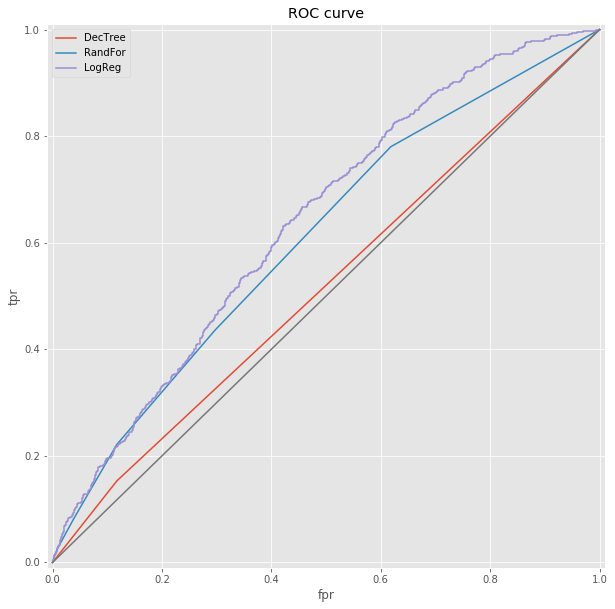

In [35]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

predict_d = dtc.predict_proba(X_t)
predict_r = rfc.predict_proba(X_t)
predict_l = lr.predict_proba(X_t)

fpr_1, tpr_1, thresholds_1 = roc_curve(y_t, predict_d[:,1])

fpr_2, tpr_2, thresholds_2 = roc_curve(y_t, predict_r[:,1])

fpr_3, tpr_3, thresholds_3 = roc_curve(y_t, predict_l[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr_1, tpr_1,  label="DecTree")
plt.plot(fpr_2, tpr_2 , label="RandFor")
plt.plot(fpr_3, tpr_3, label="LogReg")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend()
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [38]:
print("DecTree roc_aiuc=", roc_auc_score(y_t, predict_d[:,1]))

print("RandFor roc_aiuc=", roc_auc_score(y_t, predict_r[:,1]))

print("LogReg roc_aiuc=", roc_auc_score(y_t, predict_l[:,1]))


DecTree roc_aiuc= 0.5177530471648119
RandFor roc_aiuc= 0.607770607097626
LogReg roc_aiuc= 0.6388110443444441


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()

cvs_dtc = cross_val_score(dtc,X, y, scoring='roc_auc', cv=cv)
cvs_rfc = cross_val_score(rfc,X, y, scoring='roc_auc', cv=cv)
cvs_lr = cross_val_score(lr,X, y, scoring='roc_auc', cv=cv)


[0.51996364 0.51913038 0.56899073 0.51552194 0.53038468 0.52336839
 0.53441812 0.51911454 0.53507937 0.50955624] mean= 0.5275528040530846


In [44]:
print (cvs_dtc ,"mean=", cvs_dtc.mean())

print (cvs_rfc ,"mean=", cvs_rfc.mean())

print (cvs_lr ,"mean=", cvs_lr.mean())

[0.51996364 0.51913038 0.56899073 0.51552194 0.53038468 0.52336839
 0.53441812 0.51911454 0.53507937 0.50955624] mean= 0.5275528040530846
[0.61278476 0.60435668 0.55985473 0.56277166 0.60196893 0.61179502
 0.59792107 0.58810733 0.55416507 0.589298  ] mean= 0.5883023251010722
[0.66016361 0.64799518 0.64206641 0.63401189 0.68193111 0.61691819
 0.60318637 0.63817305 0.59521426 0.61416606] mean= 0.6333826118416834


In [47]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
lr = LogisticRegression()
lr.fit(X,y)
res=lr.predict_proba(X_test)

In [48]:
# Померить roc_auc на тесте
roc_auc_score(y_test, res[:,1])

0.6343633087277465